In [1]:
#! /app/software/R/4.0.3-foss-2020b/bin/Rscript
## JG used R/4.1.2-foss-2020b

# load external dependencies
lmod <- Sys.getenv("LMOD_CMD")
modules <- c(
    #"cairo/1.16.0-GCCcore-10.2.0",
    "R/4.1.2-foss-2020b",
    #"X11/20201008-GCCcore-10.2.0",
    "MACS2/2.2.6-foss-2019b-Python-3.7.4")

for (module in modules) {
    cmd <- paste(lmod, 'R', 'load', module)
    code <- system(cmd, intern = TRUE)
    eval(parse(text = code))
}

In [2]:
Sys.unsetenv("DISPLAY")

suppressPackageStartupMessages({
    library(ArchR)
    library(parallel)
    library(rtracklayer)
    library(repr)
    library(dplyr)
    library(Seurat)
    library(plyr)
    library(ComplexHeatmap)
    library(RColorBrewer)    
    library(BSgenome.Hsapiens.UCSC.hg38)
    library(svglite)
})
set.seed(1)

# Set default plot size
options(repr.plot.width=10, repr.plot.height=10)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [3]:
addArchRThreads(threads = 24)

Input threads is equal to or greater than ncores minus 1 (23)
Setting cores to ncores minus 2. Set force = TRUE to set above this number!

Setting default number of Parallel threads to 22.



In [4]:
#load data
proj_name = 'DJ_Hs_PBMC_K27me3_220523_220527_79x79_MERGE_50k'
version = 'proj_FINAL'
proj_dir <- paste0("/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/ArchR/", proj_name, '/', version)
proj = loadArchRProject(path = proj_dir,
                 force = TRUE,
                 showLogo = TRUE)
setwd(proj_dir)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-57c02119618d-Date-2022-11-11_Time-11-07-35.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-57c02119618d-Date-2022-11-11_Time-11-07-35.log



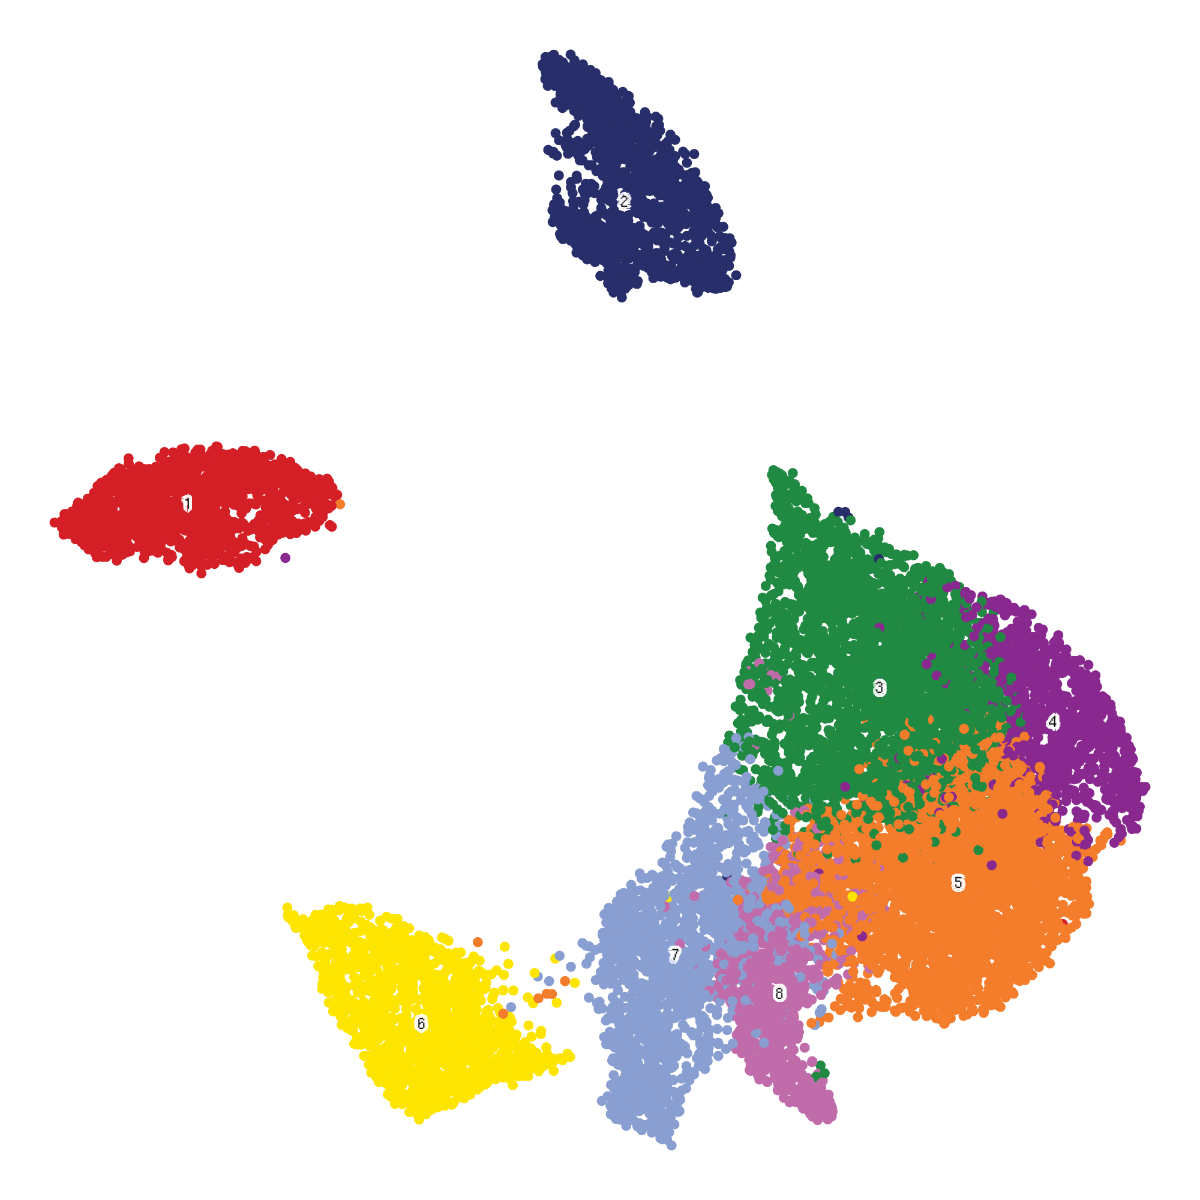

In [5]:
#Visualize clusters
plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
              name = "Clusters", 
              embedding = "UMAP", 
              size =1, 
              #pal= paletteContinuous(), 
              plotAs= "points", 
              #imputeWeights = getImputeWeights(proj)
             )+theme_void()+theme(plot.title = element_blank())+ NoLegend()

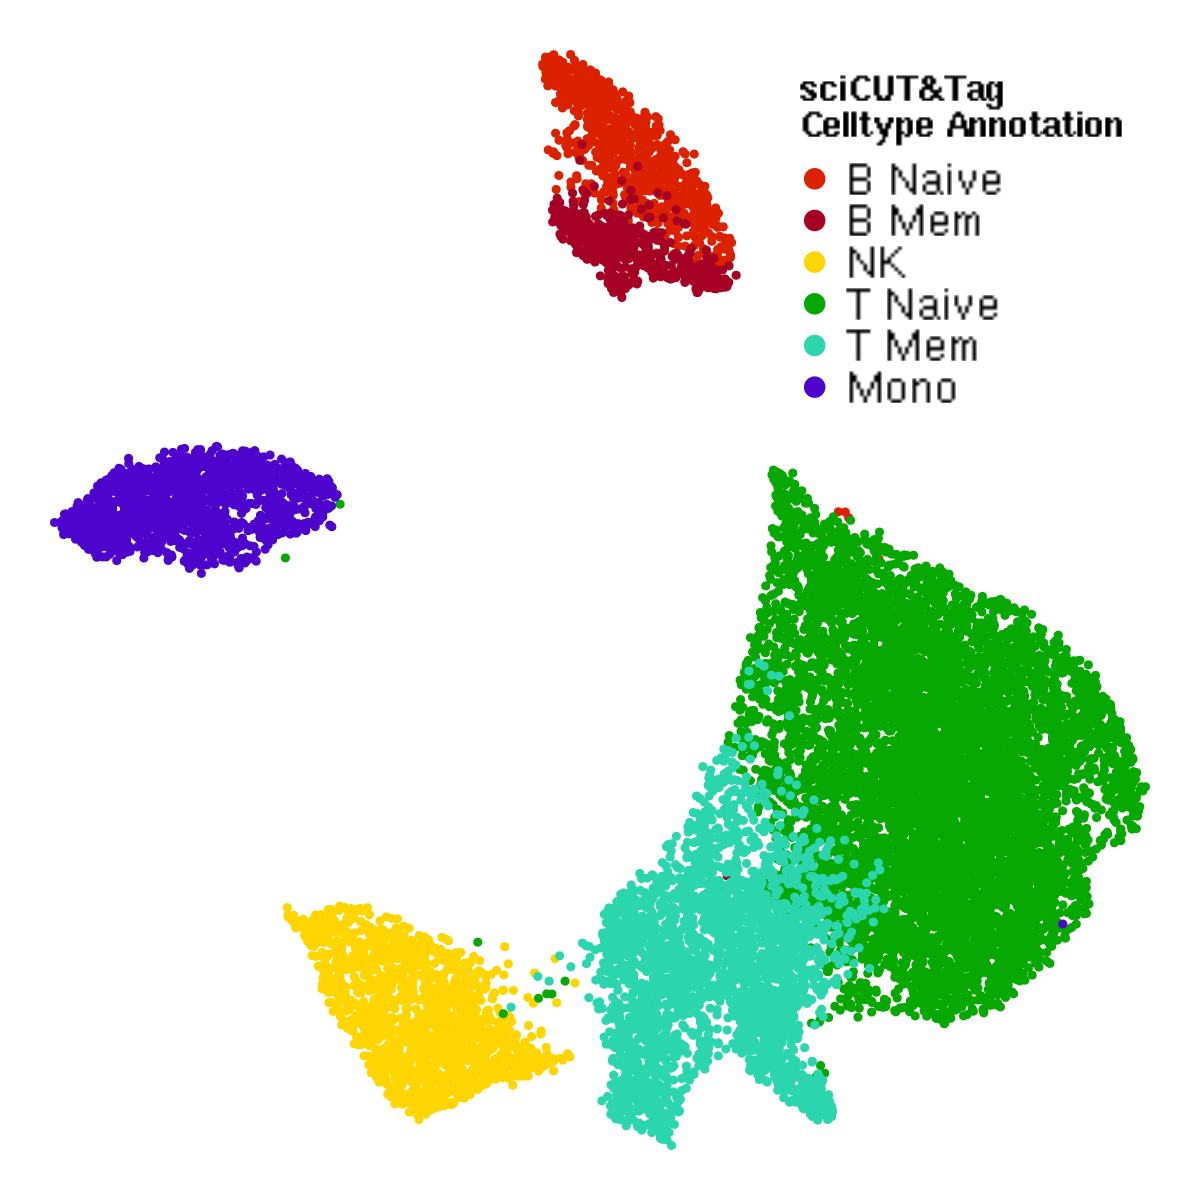

In [16]:
#Annotation

#extract umap
umap_df = proj@cellColData %>% data.frame()
umap_df$UMAP_1 = proj@embeddings$UMAP$df[,1]
umap_df$UMAP_2 = proj@embeddings$UMAP$df[,2]

#reorder and plot
ord_new = c( 'B Naive','B Mem','NK', 'T Naive','T Mem', 'Mono')
umap_df$Clusters <- factor(umap_df$annotation1, levels = ord_new)
umap_df <- umap_df[order(umap_df$Clusters),]

plot0 = ggplot(umap_df, aes(x = UMAP_1, 
                    y = UMAP_2, 
                    color = Clusters)
    )+geom_point(position = "jitter"
    )+theme_void(
    )+theme(legend.position = c(.80, .80), 
            legend.text = element_text(size=25, family = 'Helvetica'),
            legend.title = element_text(size=20, family = 'Helvetica', face = "bold")
    )+guides(color = guide_legend(override.aes = list(size = 5))
    )+scale_color_manual(name = "sciCUT&Tag \nCelltype Annotation",
                         values = c(#B
                                     "#db2100", 
                                    "#a60024",
                                    #NK
                                    "#ffd500",
                                    #T
                                    "#07a802",
                                    #"#139c90",
                                    #"#c5eb7a", 
                                    "#2bd6ae",
                                     #Mono
                                    #'#b23dd9',
                                    "#4d04cc")
                        )
plot0

In [17]:
plot_dir = '/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Figures/'
pdf(file=paste0(plot_dir, '221111_PBMC_K27me3_cell_annotation.pdf'),width=10, height=10)
plot0
dev.off()

png 
  2

In [189]:
#load Altius CnT data
sum_dir = '/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Altius_Immunopedia/H3K27me3_altius_immunopedia_50000.RDS'
seCHIP = readRDS(sum_dir)
seCHIP

class: RangedSummarizedExperiment 
dim: 61776 65 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(0):
colnames(65): 31641.bam 31648.bam ... 44621.bam 44624.bam
colData names(251): id antibody ... paired depth

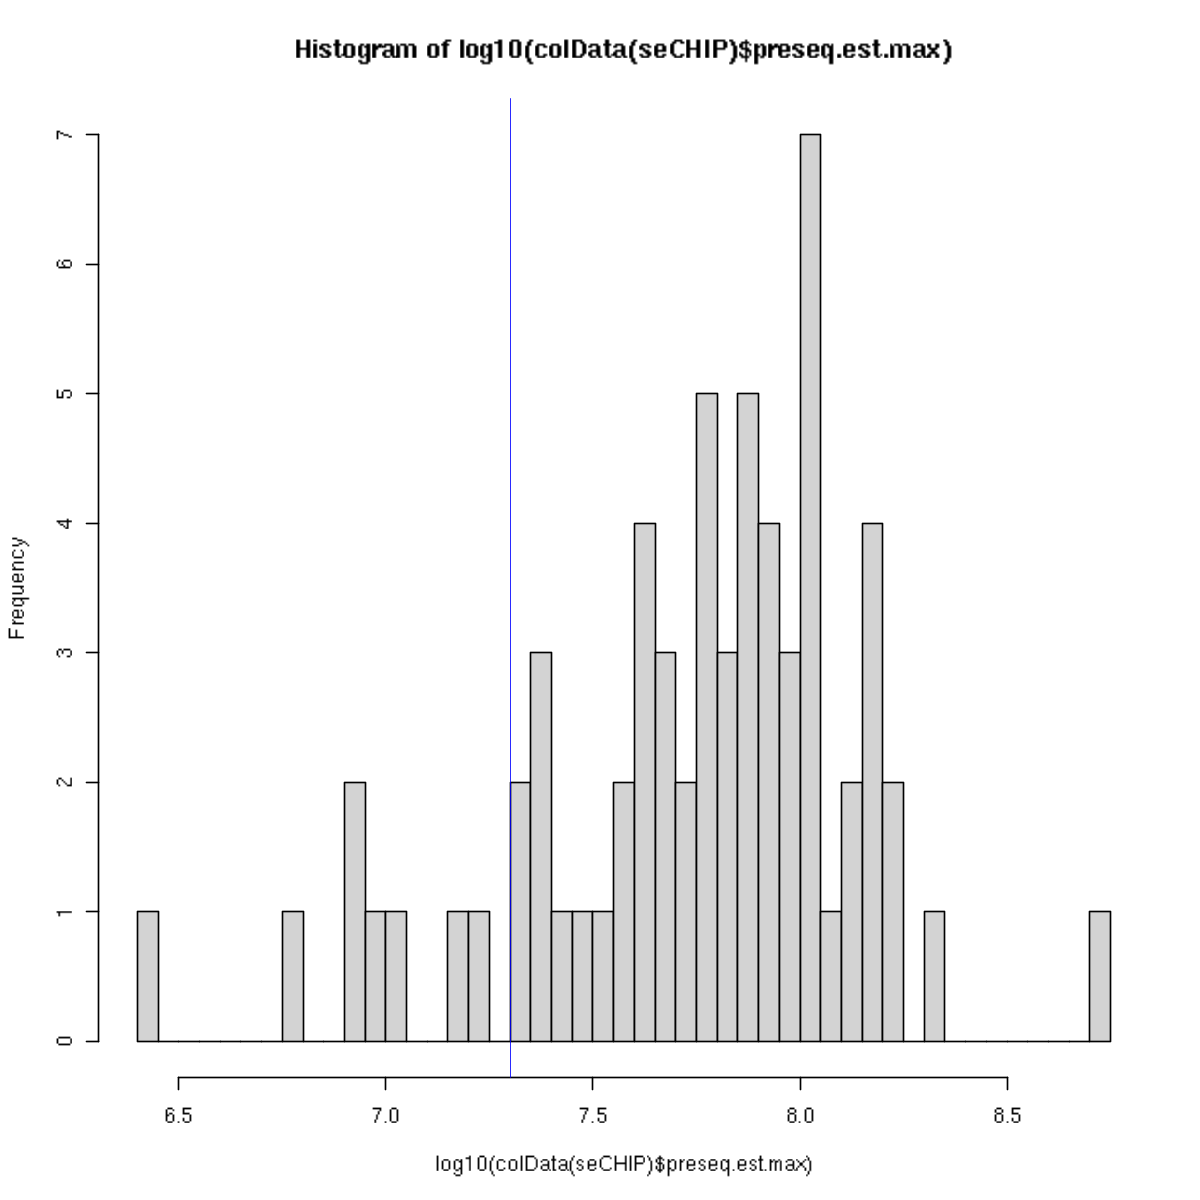

In [190]:
#plot spot score
low_cutoff = 10^7.3
#hi_cutoff = 10^8.1
hist(log10(colData(seCHIP)$preseq.est.max), breaks = 50)
abline(v=log10(low_cutoff),col="blue",lwd=0.5)
#abline(v=log10(hi_cutoff),col="red",lwd=0.5)

In [191]:
seCHIP1 = subset(seCHIP, select = !(colData(seCHIP)$preseq.est.max > low_cutoff))
seCHIP1@colData$taxonomy_name
seCHIP1@colData$`id.1`

[1] "h.CD19.memory" "h.CD14+"       "h.CD16+"       "h.CD14+++"    
[5] "h.CD8.naive"   "h.CD16+"       "h.CD56.Bright" "h.CD56.Dim"

[1] 31641 31655 31731 31738 31811 35500 41781 41785

In [192]:
table(colData(seCHIP)$taxonomy_name)


              h.CD14+             h.CD14+++          h.CD14+CD16+ 
                    4                     4                     2 
              h.CD16+         h.CD19.memory          h.CD19.naive 
                    2                     4                     4 
               h.CD3+  h.CD4.memory.central h.CD4.memory.effector 
                    3                     2                     3 
          h.CD4.naive             h.CD4.Th1            h.CD4.Th17 
                    3                     2                     3 
            h.CD4.Th2            h.CD4.Treg         h.CD56.Bright 
                    3                     4                     2 
           h.CD56.Dim            h.CD8.EMRA  h.CD8.memory.central 
                    3                     2                     2 
h.CD8.memory.effector           h.CD8.naive          h.neutrophil 
                    4                     5                     1 
               h.PBMC 
                    3 

In [193]:
#remove noisy data
seCHIP = subset(seCHIP, select = !(colnames(seCHIP) %in% c('39579.bam', #bad CD14+
                                                           '35505.bam', #bad CD14+CD16+
                                                           '31648.bam', '39459.bam', #CD19.naive
                                                           '41115.bam','31641.bam', #CD19.memory 
                                                           '33592.bam',#, '35116.bam' #CD8.memory.effector
                                                           '39085.bam', #CD4.Th1
                                                           '31738.bam', #h.CD14+++
                                                           '41781.bam', #h.CD56.Bright
                                                           '35152.bam' #h.CD4.Th17
                                                          )))
seCHIP

class: RangedSummarizedExperiment 
dim: 61776 54 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(0):
colnames(54): 31655.bam 31731.bam ... 44621.bam 44624.bam
colData names(251): id antibody ... paired depth

In [194]:
projection<-projectBulkATAC(
  ArchRProj = proj,
  seATAC = seCHIP,
  reducedDims = "IterativeLSI",
  embedding = "UMAP",
  n = 500, 
  verbose = TRUE,
  threads = getArchRThreads(),
  logFile = createLogFile("projectBulkATAC")
)

ArchR logging to : ArchRLogs/ArchR-projectBulkATAC-2f2e22fffa44-Date-2022-10-17_Time-13-35-45.log
If there is an issue, please report to github with logFile!

Overlap Ratio of Reduced Dims Features = 0.999620649843312

2022-10-17 13:35:46 : 

13:36:04 Creating temp directory /loc/scratch/66622569/RtmptFi1rb/dir2f2e3d7474d4

untar: using cmd = ‘/bin/tar -xf '/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/ArchR/scCnTpro_PBMC_H3K27me3_goodcells_50k/MERGE_ALL/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-4dd17d7fe02e-Date-2022-10-03_Time-21-38-28.tar' -C '/loc/scratch/66622569/RtmptFi1rb/dir2f2e3d7474d4'’

13:36:04 Read 32000 rows
 and found 15 numeric columns

13:36:04 Processing block 1 of 1

13:36:04 Writing NN index file to temp file /loc/scratch/66622569/RtmptFi1rb/file2f2eeddee66

13:36:04 Searching Annoy index using 11 threads, search_k = 4000

13:36:06 Commencing smooth kNN distance calibration using 11 threads
 with target n_neighbors = 40

13:36:06 Initializing by weighted

In [195]:
### import meta
meta = read.csv('/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Altius_Immunopedia/K27_meta.csv')

p<-as.data.frame(do.call(rbind, projection[2:1]))
p$ds = data.frame(t(data.frame(strsplit(rownames(p), '#'))))$X1

unique(p$ds)
length(unique(p$ds))

[1] "DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527"
 [2] "31655.bam"                             
 [3] "31731.bam"                             
 [4] "31811.bam"                             
 [5] "31813.bam"                             
 [6] "33562.bam"                             
 [7] "33564.bam"                             
 [8] "33593.bam"                             
 [9] "35086.bam"                             
[10] "35092.bam"                             
[11] "35098.bam"                             
[12] "35104.bam"                             
[13] "35110.bam"                             
[14] "35116.bam"                             
[15] "35122.bam"                             
[16] "35128.bam"                             
[17] "35134.bam"                             
[18] "35140.bam"                             
[19] "35146.bam"                             
[20] "35158.bam"                             
[21] "35164.bam"                             
[22] "35170.bam"                             
[23] "35500.bam"                             
[24] "35510.bam"                             
[25] "35520.bam"                             
[26] "35526.bam"                             
[27] "35532.bam"                             
[28] "35831.bam"                             
[29] "37894.bam"                             
[30] "37898.bam"                             
[31] "39080.bam"                             
[32] "39445.bam"                             
[33] "39450.bam"                             
[34] "39454.bam"                             
[35] "39463.bam"                             
[36] "39467.bam"                             
[37] "39472.bam"                             
[38] "39476.bam"                             
[39] "39481.bam"                             
[40] "40452.bam"                             
[41] "41077.bam"                             
[42] "41082.bam"                             
[43] "41087.bam"                             
[44] "41092.bam"                             
[45] "41097.bam"                             
[46] "41102.bam"                             
[47] "41107.bam"                             
[48] "41110.bam"                             
[49] "41120.bam"                             
[50] "41125.bam"                             
[51] "41785.bam"                             
[52] "42455.bam"                             
[53] "42460.bam"                             
[54] "44621.bam"                             
[55] "44624.bam"

[1] 55

In [196]:
#map names to celltype

acc = meta$local[which(meta$local %in% p$ds)]
cel = meta$taxonomy_name[which(meta$local %in% p$ds)]
p$ds <- mapvalues(p$ds, from=acc, to=cel)
p = p[order(p$ds), ]
unique(p$ds)

[1] "DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527"
 [2] "h.CD14+"                               
 [3] "h.CD14+++"                             
 [4] "h.CD14+CD16+"                          
 [5] "h.CD16+"                               
 [6] "h.CD19.memory"                         
 [7] "h.CD19.naive"                          
 [8] "h.CD3+"                                
 [9] "h.CD4.memory.central"                  
[10] "h.CD4.memory.effector"                 
[11] "h.CD4.naive"                           
[12] "h.CD4.Th1"                             
[13] "h.CD4.Th17"                            
[14] "h.CD4.Th2"                             
[15] "h.CD4.Treg"                            
[16] "h.CD56.Bright"                         
[17] "h.CD56.Dim"                            
[18] "h.CD8.EMRA"                            
[19] "h.CD8.memory.central"                  
[20] "h.CD8.memory.effector"                 
[21] "h.CD8.naive"                           
[22] "h.neutrophil"                          
[23] "h.PBMC"

In [197]:
#rename celltypes
unq = unique(p$ds)

ann = c('sciCUT&Tag',
        
        'CD14+', 
        'CD14+++', 
        'CD14+CD16+', 
        'CD16+',   
        
        'CD19 Mem',
        'CD19 Naive', 
        
        'CD3+', 
        
        'CD4 Mem.C',
        'CD4 Mem.E', 

        'CD4 Naive',
        'CD4 Th1', 
        'CD4 Th17',     
        'CD4 Treg',
        'CD4 Th2', 
      
        'CD56+++',  
        'CD56+',
        
        'CD8 EMRA',
        'CD8 Mem.C',
        'CD8 Mem.E',
        'CD8 Naive',  

        'Neutrophil', 

        'PBMC'
        )

p$ds <- mapvalues(p$ds, from=unq, to=ann)

In [198]:
#reorder
ord_new = c('sciCUT&Tag',
            
            'CD19 Naive', 
            'CD19 Mem', 

            'CD56+',
            'CD56+++', 
            
            'CD3+',
            'CD4 Naive',
            'CD8 Naive',
            
            'CD4 Th1', 
            'CD4 Th2',            
            'CD4 Th17', 
            'CD4 Treg',
            
            'CD4 Mem.C',
            'CD4 Mem.E', 
            
            'CD8 Mem.C',
            'CD8 Mem.E',
            'CD8 EMRA',

            'CD14+', 
            'CD16+',
            'CD14+++', 
            'CD14+CD16+',            
            'Neutrophil', 
            
            'PBMC'             
            )
        
p$ds <- factor(p$ds, levels = ord_new)
p <- p[order(p$ds),]

#drop noisy data
p<-p[!(p$ds %in% c('PBMC',  'CD3+', 'CD56+++', 'CD8 EMRA','CD16+', 'Neutrophil')),]

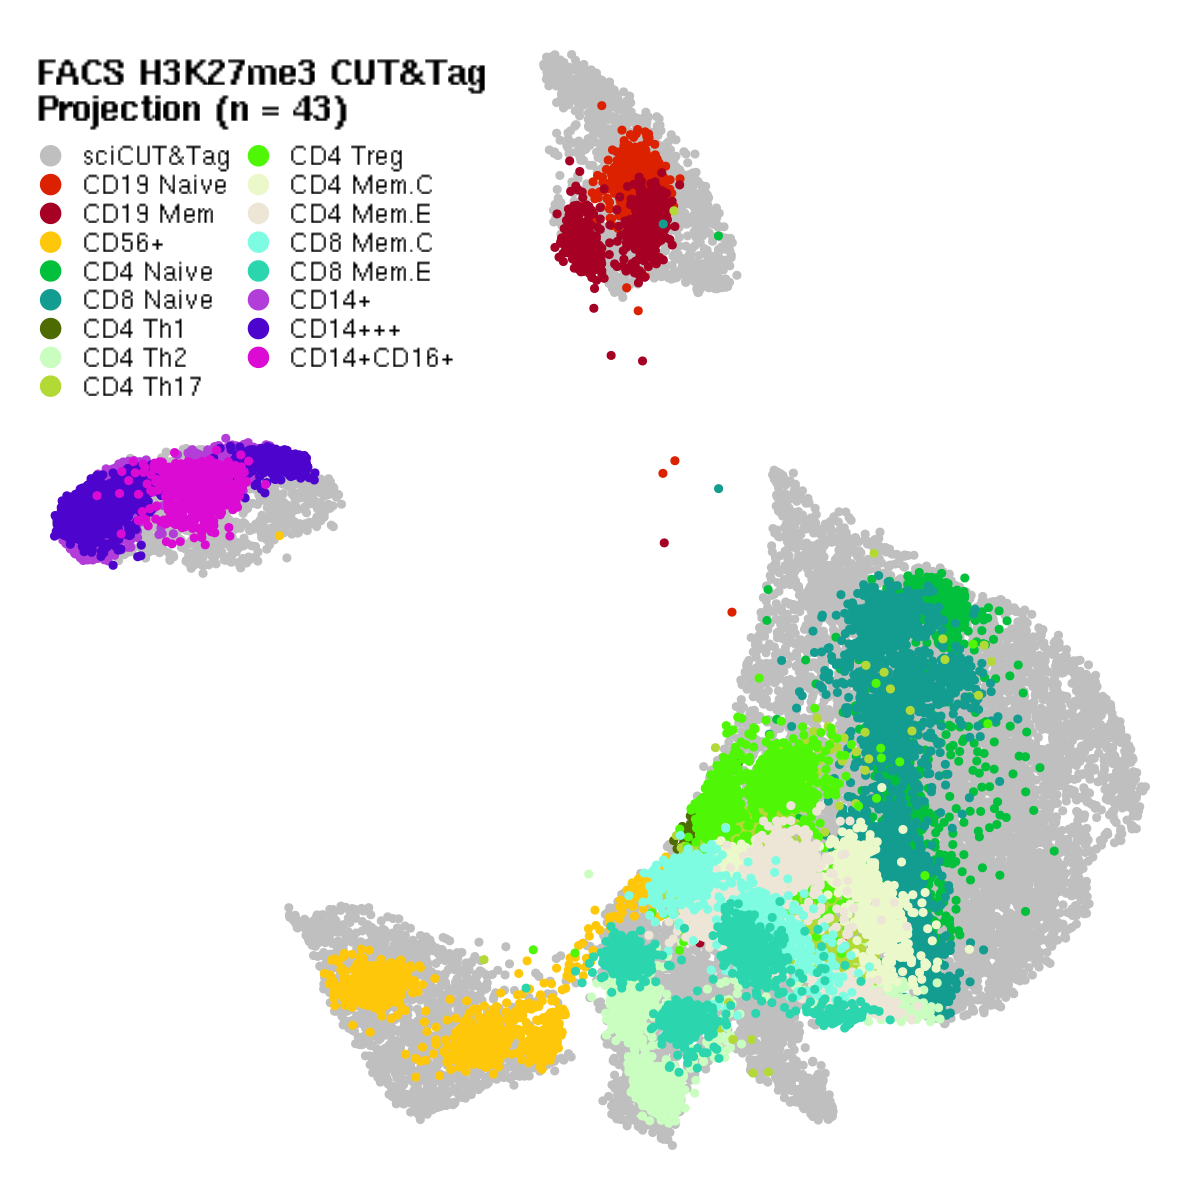

In [199]:
#plot
plot1 = ggplot(p, aes(x=UMAP1, 
              y=UMAP2, 
              color = ds))+geom_point(position = "jitter"
    )+theme_void()+theme(#plot.title = element_blank(), 
            #strip.text = element_blank(), 
            legend.position = c(.22, .81),
            legend.text = element_text(size=15, family = 'Helvetica'),
            legend.title = element_text(size=20, face = "bold", family = 'Helvetica')
    )+guides(color = guide_legend(override.aes = list(size = 5), ncol=2)
    )+scale_color_manual(name = "FACS H3K27me3 CUT&Tag \nProjection (n = 43)",
                         values = c("gray75",
                                    #B
                                    "#db2100", 
                                    "#a60024",
                                    #NK
                                    #"#ffd500",
                                    "#FFC70A",               
                                    #Naive T
                                    "#03C03C",
                                    "#139c90",
                                    #Treg
                                    '#4d6b00',
                                    '#c9fec0',
                                    "#B3D936",
                                    "#4ff707",
                                    #CD4 Mem
                                    '#EAF8CA',
                                    '#ede6d6',
                                    #CD8 Mem
                                    '#7efce1',
                                    "#2bd6ae",
                                    #'#A5E3F7',
                                    #'#75CFEE',
                                    #'#2270C4',
                                    #Mono
                                    '#b23dd9',
                                    "#4d04cc",
                                    "#db0bd4",
                                    '#DDB6E3'
                                    #'#D4A994'
                                   ))
plot1


In [200]:
#save
pdf(file=paste0(plot_dir, '221015_PBMC_K27me3_altius_projection.pdf'),width=10, height=10)
plot1
dev.off()

png 
  2

# ChIP projection

In [53]:
#load ENCODE ChIP data
sum_dir = '/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Encode_Blood_K27me3_ChIPv3/H3K27me3_encode_blood_50000.RDS'
seCHIP = readRDS(sum_dir)
seCHIP

class: RangedSummarizedExperiment 
dim: 61776 68 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(0):
colnames(68): ENCFF857GAP.bam ENCFF507NNO.bam ... ENCFF671PUS.bam
  ENCFF495AKU.bam
colData names(62): File.accession File.format ... paired depth

In [54]:
table(colData(seCHIP)$Biosample.term.name)


                                                   B cell 
                                                        2 
                                   CD14-positive monocyte 
                                                        4 
                   CD4-positive, alpha-beta memory T cell 
                                                        8 
                          CD4-positive, alpha-beta T cell 
                                                        2 
CD4-positive, CD25-positive, alpha-beta regulatory T cell 
                                                        8 
                   CD8-positive, alpha-beta memory T cell 
                                                        6 
                          CD8-positive, alpha-beta T cell 
                                                        2 
     naive thymus-derived CD4-positive, alpha-beta T cell 
                                                       16 
                                      natural killer ce

In [55]:
#remove noisy data
seCHIP = subset(seCHIP, select = !(colnames(seCHIP) %in% c('ENCFF018TUL.bam', 'ENCFF883GHB.bam','ENCFF951OZO.bam' #naive CD4
                                                          )))
seCHIP

class: RangedSummarizedExperiment 
dim: 61776 65 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(0):
colnames(65): ENCFF857GAP.bam ENCFF507NNO.bam ... ENCFF671PUS.bam
  ENCFF495AKU.bam
colData names(62): File.accession File.format ... paired depth

In [56]:
projection<-projectBulkATAC(
  ArchRProj = proj,
  seATAC = seCHIP,
  reducedDims = "IterativeLSI",
  embedding = "UMAP",
  n = 500, 
  verbose = TRUE,
  threads = getArchRThreads(),
  logFile = createLogFile("projectBulkATAC")
)

ArchR logging to : ArchRLogs/ArchR-projectBulkATAC-170329b07a24-Date-2022-10-15_Time-00-44-33.log
If there is an issue, please report to github with logFile!

Overlap Ratio of Reduced Dims Features = 0.999620649843312

2022-10-15 00:44:34 : 

00:44:53 Creating temp directory /loc/scratch/66622569/Rtmpq1De7z/dir170367384e9c

untar: using cmd = ‘/bin/tar -xf '/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/ArchR/scCnTpro_PBMC_H3K27me3_goodcells_50k/MERGE_ALL/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-4dd17d7fe02e-Date-2022-10-03_Time-21-38-28.tar' -C '/loc/scratch/66622569/Rtmpq1De7z/dir170367384e9c'’

00:44:54 Read 37500 rows
 and found 15 numeric columns

00:44:54 Processing block 1 of 1

00:44:54 Writing NN index file to temp file /loc/scratch/66622569/Rtmpq1De7z/file17032fb44a0a

00:44:54 Searching Annoy index using 11 threads, search_k = 4000

00:44:55 Commencing smooth kNN distance calibration using 11 threads
 with target n_neighbors = 40

00:44:56 Initializing by weighte

In [57]:
meta = read.csv('/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Encode_Blood_K27me3_ChIPv3/GRCh38_meta.tsv', sep = '\t')

p<-as.data.frame(do.call(rbind, projection[2:1]))
p$ds = data.frame(t(data.frame(strsplit(rownames(p), '#'))))$X1

In [58]:
unique(p$ds)

[1] "DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527"
 [2] "ENCFF857GAP.bam"                       
 [3] "ENCFF507NNO.bam"                       
 [4] "ENCFF400MUZ.bam"                       
 [5] "ENCFF314GAI.bam"                       
 [6] "ENCFF624ECJ.bam"                       
 [7] "ENCFF304SJM.bam"                       
 [8] "ENCFF371YXV.bam"                       
 [9] "ENCFF712GFX.bam"                       
[10] "ENCFF834JQV.bam"                       
[11] "ENCFF425TZY.bam"                       
[12] "ENCFF434QGB.bam"                       
[13] "ENCFF333ASS.bam"                       
[14] "ENCFF245GAM.bam"                       
[15] "ENCFF105ORS.bam"                       
[16] "ENCFF872OTS.bam"                       
[17] "ENCFF147LMN.bam"                       
[18] "ENCFF020YFD.bam"                       
[19] "ENCFF098IRM.bam"                       
[20] "ENCFF502VFY.bam"                       
[21] "ENCFF513YIV.bam"                       
[22] "ENCFF084ZBK.bam"                       
[23] "ENCFF087NRY.bam"                       
[24] "ENCFF342WMD.bam"                       
[25] "ENCFF976RHJ.bam"                       
[26] "ENCFF988NDL.bam"                       
[27] "ENCFF116NLA.bam"                       
[28] "ENCFF461SVW.bam"                       
[29] "ENCFF334WPE.bam"                       
[30] "ENCFF696MGV.bam"                       
[31] "ENCFF732MYN.bam"                       
[32] "ENCFF764PAS.bam"                       
[33] "ENCFF638ZKU.bam"                       
[34] "ENCFF207YHH.bam"                       
[35] "ENCFF235ZNC.bam"                       
[36] "ENCFF679BQA.bam"                       
[37] "ENCFF720UGT.bam"                       
[38] "ENCFF753TMK.bam"                       
[39] "ENCFF997SUE.bam"                       
[40] "ENCFF691NHP.bam"                       
[41] "ENCFF445ERH.bam"                       
[42] "ENCFF939DUO.bam"                       
[43] "ENCFF410RIU.bam"                       
[44] "ENCFF636ACP.bam"                       
[45] "ENCFF915PET.bam"                       
[46] "ENCFF215FYO.bam"                       
[47] "ENCFF022BBV.bam"                       
[48] "ENCFF927SPF.bam"                       
[49] "ENCFF111WJR.bam"                       
[50] "ENCFF940QMV.bam"                       
[51] "ENCFF780RYE.bam"                       
[52] "ENCFF897ZRR.bam"                       
[53] "ENCFF955WRH.bam"                       
[54] "ENCFF127YBX.bam"                       
[55] "ENCFF569EVB.bam"                       
[56] "ENCFF946HQZ.bam"                       
[57] "ENCFF632ZDQ.bam"                       
[58] "ENCFF503OCH.bam"                       
[59] "ENCFF484YFZ.bam"                       
[60] "ENCFF704UKV.bam"                       
[61] "ENCFF510AZC.bam"                       
[62] "ENCFF016RNX.bam"                       
[63] "ENCFF800GBO.bam"                       
[64] "ENCFF291MDT.bam"                       
[65] "ENCFF671PUS.bam"                       
[66] "ENCFF495AKU.bam"

In [59]:
#map names to celltype
acc = meta$accession[which(meta$accession %in% p$ds)]
cel = meta$Biosample.term.name[which(meta$accession %in% p$ds)]
p$ds <- mapvalues(p$ds, from=acc, to=cel)
p = p[order(p$ds), ]

In [60]:
unique(p$ds)

[1] "B cell"                                                   
 [2] "CD14-positive monocyte"                                   
 [3] "CD4-positive, alpha-beta memory T cell"                   
 [4] "CD4-positive, alpha-beta T cell"                          
 [5] "CD4-positive, CD25-positive, alpha-beta regulatory T cell"
 [6] "CD8-positive, alpha-beta memory T cell"                   
 [7] "CD8-positive, alpha-beta T cell"                          
 [8] "DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527"                   
 [9] "naive thymus-derived CD4-positive, alpha-beta T cell"     
[10] "natural killer cell"                                      
[11] "T-cell"                                                   
[12] "T-helper 17 cell"

In [61]:
#rename celltypes
unq = unique(p$ds)
ann = c('B',
        'CD14 Mono', 
        'CD4 Mem', 
        'CD4 T', 
        'CD4 Treg', 
        'CD8 Mem', 
        'CD8 T', 
        'sciCUT&Tag',
        'CD4 Naive',
        'NK',
        'T',
        'CD4 Th17'
        )

p$ds <- mapvalues(p$ds, from=unq, to=ann)

#reorder and plot
ord_new = c('sciCUT&Tag',
            'B',
            'NK', 
            'T', 
            
            'CD4 Naive', 
            'CD4 T',            
            'CD8 T',
            'CD4 Th17',
            'CD4 Treg',
            
            'CD4 Mem', 
            'CD8 Mem', 
            
            'CD14 Mono')

p$ds <- factor(p$ds, levels = ord_new)
p <- p[order(p$ds),]

#drop CD4 Mem noisy data
p<-p[!(p$ds=='T'),]

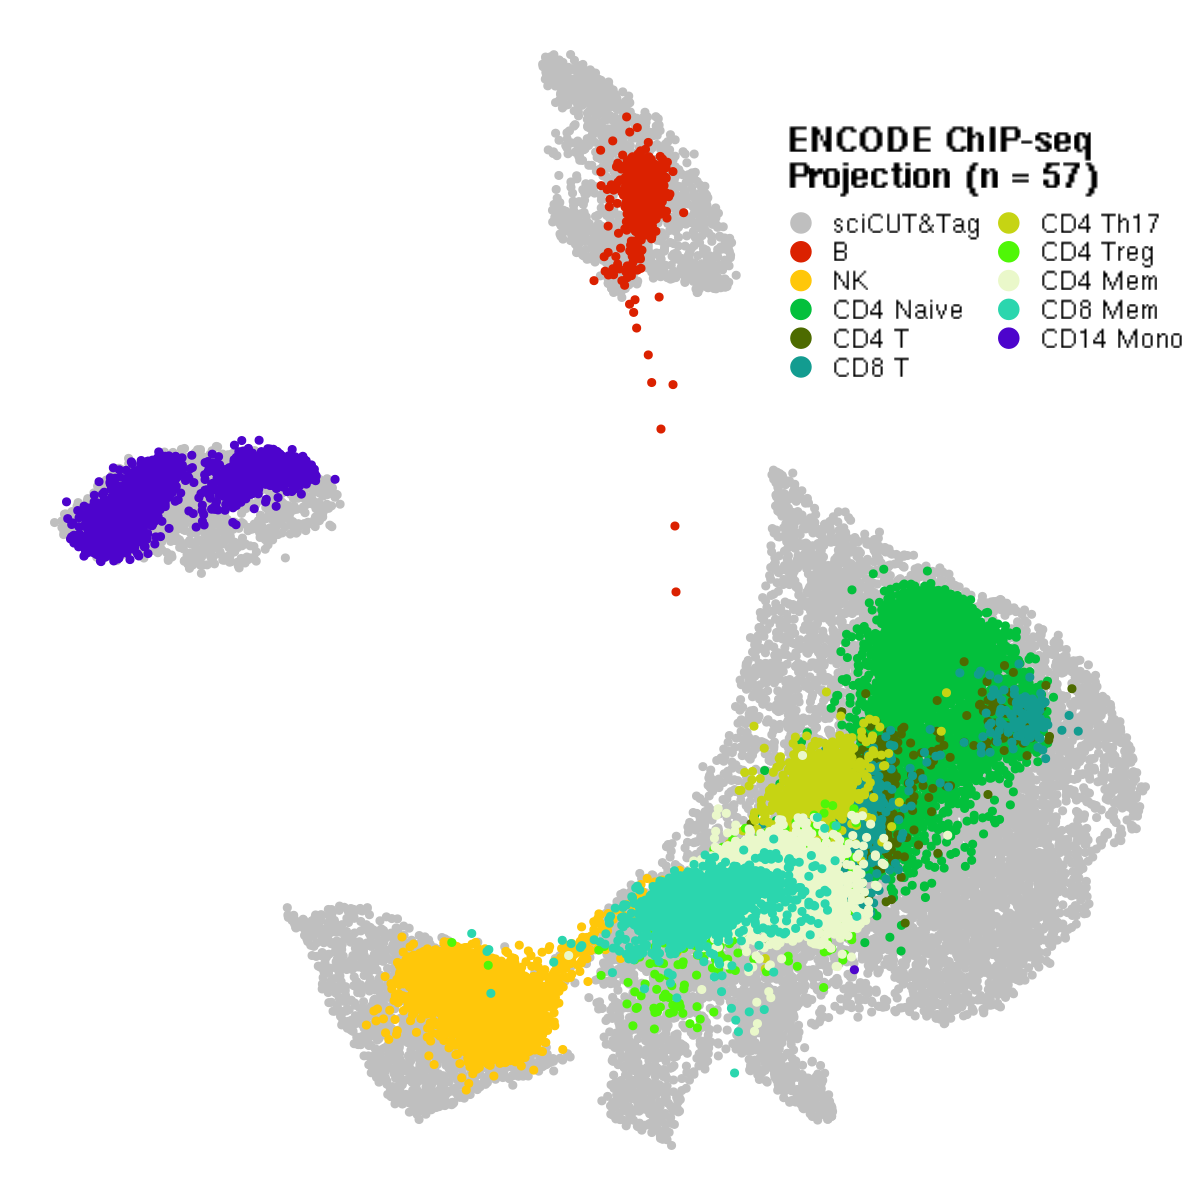

In [64]:
plot2 = ggplot(p, aes(x=UMAP1, 
              y=UMAP2, 
              color = ds))+geom_point(position = "jitter"
    )+theme_void()+theme(#plot.title = element_blank(), 
            #strip.text = element_blank(), 
            legend.position = c(.82, .79),
            legend.text = element_text(size=15, family = 'Helvetica'),
            legend.title = element_text(size=20, face = "bold", family = 'Helvetica')
    )+guides(color = guide_legend(override.aes = list(size = 5), ncol=2)
    )+scale_color_manual(name = "ENCODE ChIP-seq \nProjection (n = 57)",
                         values = c("gray75",
                                    #B
                                    "#db2100",
                                    #NK
                                    "#FFC70A",
                                    # Naive T
                                    "#03C03C",
                                    '#4d6b00',
                                    "#139c90",
                                    #Treg
                                    '#C6D413',
                                    "#4ff707",
                                    #CD4 Mem
                                    '#EAF8CA',
                                    #CD8 Mem
                                    '#2bd6ae',
                                    #Mono
                                    "#4d04cc"
                                   )
)
plot2

In [65]:
#save
pdf(file=paste0(plot_dir, '221015_PBMC_K27me3_ENCODE_projection.pdf'),width=10, height=10)
plot2
dev.off()

png 
  2

# ChIP projection v2

In [169]:
#load ENCODE ChIP data
sum_dir = '/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Encode_Blood_K27me3_ChIPv4/H3K27me3_encode_blood_50000.RDS'
seCHIP = readRDS(sum_dir)
seCHIP

class: RangedSummarizedExperiment 
dim: 61776 170 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(0):
colnames(170): ENCFF397LHT.bam ENCFF007XDN.bam ... ENCFF959WVG.bam
  ENCFF391FXR.bam
colData names(62): File.accession File.format ... paired depth

In [170]:
#table(colData(seCHIP)$Output.type)
seCHIP_raw = subset(seCHIP, select = !(colData(seCHIP)$Output.type == 'alignments'))
seCHIP = subset(seCHIP, select = colData(seCHIP)$Output.type == 'alignments')
seCHIP = seCHIP_raw

In [171]:
table(colData(seCHIP)$Biosample.term.name)


                                           activated B cell 
                                                          1 
           activated CD4-positive, alpha-beta memory T cell 
                                                          1 
                  activated CD4-positive, alpha-beta T cell 
                                                          2 
                  activated CD8-positive, alpha-beta T cell 
                                                          1 
            activated naive CD4-positive, alpha-beta T cell 
                                                          2 
            activated naive CD8-positive, alpha-beta T cell 
                                                          3 
                                           activated T-cell 
                                                          6 
                                 activated T-helper 17 cell 
                                                          1 
                       

In [172]:
projection<-projectBulkATAC(
  ArchRProj = proj,
  seATAC = seCHIP,
  reducedDims = "IterativeLSI",
  embedding = "UMAP",
  n = 500, 
  verbose = TRUE,
  threads = getArchRThreads(),
  logFile = createLogFile("projectBulkATAC")
)

ArchR logging to : ArchRLogs/ArchR-projectBulkATAC-2f2e7cb5d1db-Date-2022-10-17_Time-12-57-26.log
If there is an issue, please report to github with logFile!

Overlap Ratio of Reduced Dims Features = 0.999620649843312

2022-10-17 12:57:28 : 

12:57:51 Creating temp directory /loc/scratch/66622569/RtmptFi1rb/dir2f2e469259fa

untar: using cmd = ‘/bin/tar -xf '/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/ArchR/scCnTpro_PBMC_H3K27me3_goodcells_50k/MERGE_ALL/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-4dd17d7fe02e-Date-2022-10-03_Time-21-38-28.tar' -C '/loc/scratch/66622569/RtmptFi1rb/dir2f2e469259fa'’

12:57:51 Read 47500 rows
 and found 15 numeric columns

12:57:51 Processing block 1 of 1

12:57:51 Writing NN index file to temp file /loc/scratch/66622569/RtmptFi1rb/file2f2e16467b66

12:57:51 Searching Annoy index using 11 threads, search_k = 4000

12:57:53 Commencing smooth kNN distance calibration using 11 threads
 with target n_neighbors = 40

12:57:54 Initializing by weighte

In [173]:
meta = read.csv('/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Encode_Blood_K27me3_ChIPv4/K27_meta_FINAL.csv')

p<-as.data.frame(do.call(rbind, projection[2:1]))
p$ds = data.frame(t(data.frame(strsplit(rownames(p), '#'))))$X1

In [174]:
unique(p$ds)

[1] "DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527"
 [2] "ENCFF397LHT.bam"                       
 [3] "ENCFF919VNP.bam"                       
 [4] "ENCFF400MUZ.bam"                       
 [5] "ENCFF727IHT.bam"                       
 [6] "ENCFF960LZQ.bam"                       
 [7] "ENCFF468OOL.bam"                       
 [8] "ENCFF624ECJ.bam"                       
 [9] "ENCFF018TUL.bam"                       
[10] "ENCFF371YXV.bam"                       
[11] "ENCFF983YSV.bam"                       
[12] "ENCFF918WXP.bam"                       
[13] "ENCFF200ZVO.bam"                       
[14] "ENCFF547GAA.bam"                       
[15] "ENCFF834JQV.bam"                       
[16] "ENCFF772STN.bam"                       
[17] "ENCFF857GAP.bam"                       
[18] "ENCFF907BAL.bam"                       
[19] "ENCFF744ZMC.bam"                       
[20] "ENCFF532JGA.bam"                       
[21] "ENCFF937NHK.bam"                       
[22] "ENCFF255CTM.bam"                       
[23] "ENCFF236LHY.bam"                       
[24] "ENCFF679NOK.bam"                       
[25] "ENCFF033DWA.bam"                       
[26] "ENCFF692JYB.bam"                       
[27] "ENCFF811CPK.bam"                       
[28] "ENCFF622DGO.bam"                       
[29] "ENCFF434QGB.bam"                       
[30] "ENCFF105ORS.bam"                       
[31] "ENCFF112JST.bam"                       
[32] "ENCFF022BBV.bam"                       
[33] "ENCFF949SEI.bam"                       
[34] "ENCFF456YKH.bam"                       
[35] "ENCFF766QGO.bam"                       
[36] "ENCFF679BQA.bam"                       
[37] "ENCFF753TMK.bam"                       
[38] "ENCFF173JRM.bam"                       
[39] "ENCFF422ZTY.bam"                       
[40] "ENCFF016RNX.bam"                       
[41] "ENCFF127YBX.bam"                       
[42] "ENCFF075NRG.bam"                       
[43] "ENCFF355FAD.bam"                       
[44] "ENCFF280BEW.bam"                       
[45] "ENCFF704UKV.bam"                       
[46] "ENCFF283YEV.bam"                       
[47] "ENCFF087NRY.bam"                       
[48] "ENCFF666XGC.bam"                       
[49] "ENCFF569EVB.bam"                       
[50] "ENCFF632ZDQ.bam"                       
[51] "ENCFF371MDD.bam"                       
[52] "ENCFF116NLA.bam"                       
[53] "ENCFF776MAT.bam"                       
[54] "ENCFF638ZKU.bam"                       
[55] "ENCFF098IRM.bam"                       
[56] "ENCFF850GXO.bam"                       
[57] "ENCFF691NHP.bam"                       
[58] "ENCFF445ERH.bam"                       
[59] "ENCFF513YIV.bam"                       
[60] "ENCFF104NOI.bam"                       
[61] "ENCFF088CEG.bam"                       
[62] "ENCFF943AER.bam"                       
[63] "ENCFF140EZW.bam"                       
[64] "ENCFF109YGY.bam"                       
[65] "ENCFF951OZO.bam"                       
[66] "ENCFF020YFD.bam"                       
[67] "ENCFF800GBO.bam"                       
[68] "ENCFF671PUS.bam"                       
[69] "ENCFF780RYE.bam"                       
[70] "ENCFF897ZRR.bam"                       
[71] "ENCFF087FOJ.bam"                       
[72] "ENCFF796GUW.bam"                       
[73] "ENCFF257LSF.bam"                       
[74] "ENCFF365JKD.bam"                       
[75] "ENCFF252PVM.bam"                       
[76] "ENCFF981DKH.bam"                       
[77] "ENCFF010AQN.bam"                       
[78] "ENCFF215FYO.bam"                       
[79] "ENCFF984OPP.bam"                       
[80] "ENCFF410RIU.bam"                       
[81] "ENCFF560XIV.bam"                       
[82] "ENCFF748SZE.bam"                       
[83] "ENCFF732MYN.bam"                       
[84] "ENCFF334WPE.bam"                       
[85] "ENCFF976RHJ.bam"                       
[86] "ENCFF391FXR.bam"

In [175]:
#map names to celltype
acc = meta$accession[which(meta$accession %in% p$ds)]
cel = meta$Biosample.term.name[which(meta$accession %in% p$ds)]
p$ds <- mapvalues(p$ds, from=acc, to=cel)
p = p[order(p$ds), ]

In [176]:
unique(p$ds)

[1] "activated B cell"                                           
 [2] "activated CD4-positive, alpha-beta memory T cell"           
 [3] "activated CD4-positive, alpha-beta T cell"                  
 [4] "activated CD8-positive, alpha-beta T cell"                  
 [5] "activated naive CD4-positive, alpha-beta T cell"            
 [6] "activated naive CD8-positive, alpha-beta T cell"            
 [7] "activated T-cell"                                           
 [8] "activated T-helper 17 cell"                                 
 [9] "activated T-helper 2 cell"                                  
[10] "B cell"                                                     
[11] "CD14-positive monocyte"                                     
[12] "CD4-positive, alpha-beta memory T cell"                     
[13] "CD4-positive, alpha-beta T cell"                            
[14] "CD4-positive, CD25-positive, alpha-beta regulatory T cell"  
[15] "CD8-positive, alpha-beta memory T cell"                     
[16] "CD8-positive, alpha-beta T cell"                            
[17] "central memory CD8-positive, alpha-beta T cell"             
[18] "dendritic cell"                                             
[19] "DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527"                     
[20] "effector memory CD8-positive, alpha-beta T cell"            
[21] "IgD-negative memory B cell"                                 
[22] "immature natural killer cell"                               
[23] "memory B cell"                                              
[24] "naive B cell"                                               
[25] "naive thymus-derived CD4-positive, alpha-beta T cell"       
[26] "naive thymus-derived CD8-positive, alpha-beta T cell"       
[27] "natural killer cell"                                        
[28] "stimulated activated CD4-positive, alpha-beta memory T cell"
[29] "stimulated activated CD4-positive, alpha-beta T cell"       
[30] "stimulated activated CD8-positive, alpha-beta memory T cell"
[31] "stimulated activated CD8-positive, alpha-beta T cell"       
[32] "stimulated activated memory B cell"                         
[33] "stimulated activated naive B cell"                          
[34] "stimulated activated naive CD4-positive, alpha-beta T cell" 
[35] "stimulated activated naive CD8-positive, alpha-beta T cell" 
[36] "T-cell"                                                     
[37] "T-helper 1 cell"                                            
[38] "T-helper 17 cell"                                           
[39] "T-helper 2 cell"

In [177]:
#rename celltypes
unq = unique(p$ds)
ann = c('B +Act',
        'CD4 Mem +Act',
        'CD4 +Act', 
        'CD8 +Act', 
        'CD4 Naive +Act', 
        'CD8 Naive +Act',
        'T +Act',
        'CD4 Th17 +Act',
        'CD4 Th2 +Act',
        'B', 
        'CD14 Mono',
        'CD4 Mem', 
        'CD4 T',
        'CD4 Treg', 
        'CD8 Mem', 
        'CD8 T', 
        'CD8 C-Mem', 
        'DC',
        'sciCUT&Tag',
        'CD8 E-Mem', 
        'IgD- B Mem', 
        'NK Immature', 
        'B Mem', 
        'B Naive', 
        'CD4 Naive', 
        'CD8 Naive', 
        'NK', 
        'CD4 Mem +Stim',
        'CD4 T +Stim',
        'CD8 Mem +Stim',
        'CD8 T +Stim',
        'B Mem +Stim', 
        'B Naive +Stim',
        'CD4 Naive +Stim',
        'CD8 Naive +Stim',
        'T', 
        'CD4 Th1',
        'CD4 Th17',
        'CD4 Th12'
        )

p$ds <- mapvalues(p$ds, from=unq, to=ann)

In [178]:
#reorder and plot
ord_new = c(
        'sciCUT&Tag',
    
        'B +Act',
    
        'CD4 Naive +Act', 
        'CD8 Naive +Act',
        
        'CD4 +Act', 
        'CD8 +Act', 
        'T +Act',
    
        'CD4 Mem +Act',
        'CD4 Th17 +Act',
        'CD4 Th2 +Act',
    
        'B', 
        'B Naive',
        'B Mem', 
        'IgD- B Mem',
    
        'NK Immature', 
        'NK', 
    
        'CD4 Naive', 
        'CD8 Naive', 
        'T', 
        'CD4 T',
        'CD8 T', 
    
        'CD4 Th1',
        'CD4 Th17',
        'CD4 Th12',
        'CD4 Treg', 
    
        'CD4 Mem', 
        
        'CD8 Mem', 
        'CD8 C-Mem',
        'CD8 E-Mem', 
    
        'CD14 Mono',
    
        'DC',
    
        'B Naive +Stim',
        'B Mem +Stim', 
    
        'CD4 T +Stim',
        'CD8 T +Stim',
    
        'CD4 Naive +Stim',
        'CD8 Naive +Stim',
        'CD4 Mem +Stim',
        'CD8 Mem +Stim'
        )

p$ds <- factor(p$ds, levels = ord_new)
p <- p[order(p$ds),]

In [179]:
#drop stim and non specific data
p<-p[!(p$ds %in% c(             
        'B +Act',
    
        'CD4 Naive +Act', 
        'CD8 Naive +Act',
        
        'CD4 +Act', 
        'CD8 +Act', 
        'T +Act',
    
        'CD4 Mem +Act',
        'CD4 Th17 +Act',
        'CD4 Th2 +Act',
    
        'B', 
        'IgD- B Mem',
    
        'NK Immature',  
        'T', 
        'CD4 T',
        'CD8 T', 
        'DC',
    
        'B Naive +Stim',
        'B Mem +Stim', 
    
        'CD4 T +Stim',
        'CD8 T +Stim',
    
        'CD4 Naive +Stim',
        'CD8 Naive +Stim',
        'CD4 Mem +Stim',
        'CD8 Mem +Stim')),]

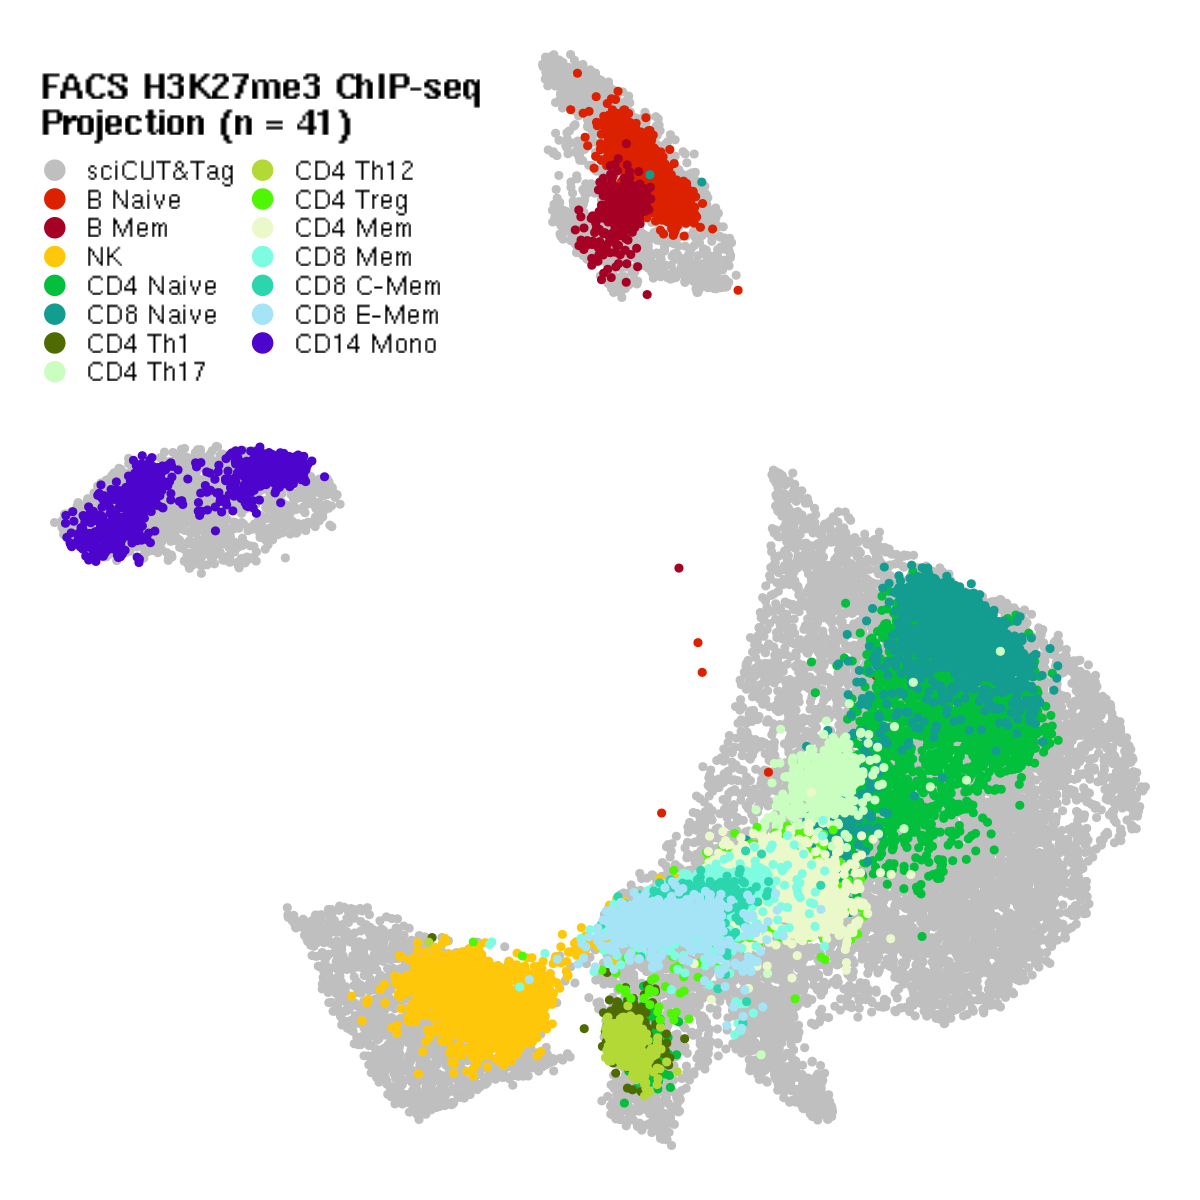

In [187]:
plot2 = ggplot(p, 
               aes(x=UMAP1, 
              y=UMAP2, 
              color = ds))+geom_point(position = "jitter"
    )+theme_void()+theme(#plot.title = element_blank(), 
            #strip.text = element_blank(), 
            legend.position = c(.22, .81),
            legend.text = element_text(size=15, family = 'Helvetica'),
            legend.title = element_text(size=20, face = "bold", family = 'Helvetica')
    )+guides(color = guide_legend(override.aes = list(size = 5), ncol=2)
    )+scale_color_manual(name = "FACS H3K27me3 ChIP-seq \nProjection (n = 41)",
                         values = c("gray75",
                                    #B
                                    "#db2100", 
                                    "#a60024",
                                    #NK
                                    #"#ffd500",
                                    "#FFC70A",               
                                    #Naive T
                                    "#03C03C",
                                    "#139c90",
                                    #Treg
                                    '#4d6b00',
                                    '#c9fec0',
                                    "#B3D936",
                                    "#4ff707",
                                    #CD4 Mem
                                    '#EAF8CA',
                                    #'#ede6d6',
                                    #CD8 Mem
                                    '#7efce1',
                                    "#2bd6ae",
                                    '#A5E3F7',
                                    #'#75CFEE',
                                    #'#2270C4',
                                    #Mono
                                    #'#b23dd9',
                                    "#4d04cc"
                                    #"#db0bd4",
                                    #'#DDB6E3'
                                    #'#D4A994'
                                   )
)
plot2

In [188]:
#save
pdf(file=paste0(plot_dir, '221016_PBMC_K27me3_ENCODE_projection_v2.pdf'),width=10, height=10)
plot2
dev.off()

png 
  2

In [114]:
a = subset(seCHIP, select = !(colData(seCHIP)$Biosample.term.name %in% c(


    'activated B cell',
    'activated CD4-positive, alpha-beta memory T cell',
    'activated CD4-positive, alpha-beta T cell',
    'activated CD8-positive, alpha-beta T cell',
    'activated naive CD4-positive, alpha-beta T cell',
    'activated naive CD8-positive, alpha-beta T cell',
    'activated T-cell',
    'activated T-helper 17 cell',
    'activated T-helper 2 cell',
    
    'B cell',
    
    'CD4-positive, alpha-beta T cell',
    'CD8-positive, alpha-beta T cell',
    'dendritic cell',
     
    'IgD-negative memory B cell',
    'immature natural killer cell',
    
    'stimulated activated CD4-positive, alpha-beta memory T cell',
    'stimulated activated CD4-positive, alpha-beta T cell',
    'stimulated activated CD8-positive, alpha-beta memory T cell',
    'stimulated activated CD8-positive, alpha-beta T cell',
    'stimulated activated memory B cell',
    'stimulated activated naive B cell',
    'stimulated activated naive CD4-positive, alpha-beta T cell',
    'stimulated activated naive CD8-positive, alpha-beta T cell',
    
    'T-cell'

)))
a
saveRDS(a, "/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Encode_Blood_K27me3_ChIPv4/H3K27me3_encode_blood_50000_FINAL.RDS")

class: RangedSummarizedExperiment 
dim: 61776 41 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(0):
colnames(41): ENCFF314GAI.bam ENCFF483ZQN.bam ... ENCFF696MGV.bam
  ENCFF988NDL.bam
colData names(62): File.accession File.format ... paired depth